In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [6]:
num_qubits = 5  # 量子比特的数量
num_gate_types = 3  # 量子门的类别数，例如可以是X门、Y门、Z门
num_timesteps = 10  # 时间步数


In [7]:
# 初始化一个四维数组
quantum_circuit_data = np.zeros((num_qubits, num_gate_types, num_timesteps, 2))

# 随机选择一些位置设置为1，模拟量子门的激活
np.random.seed(42)  # 设置随机种子以确保可复现性
activation_probability = 0.1  # 设定任一门在任一位置激活的概率

# 遍历数组，并根据概率随机激活
for qubit in range(num_qubits):
    for gate_type in range(num_gate_types):
        for time in range(num_timesteps):
            # 基于概率决定是否在此位置激活量子门
            if np.random.random() < activation_probability:
                quantum_circuit_data[qubit, gate_type, time, 1] = 1  # 设置为1表示激活

# 最后的一维是0和1，我们上面已经设置了，这里我们用第一个维度设置其它为0表示无激活
quantum_circuit_data[:, :, :, 0] = 1 - quantum_circuit_data[:, :, :, 1]


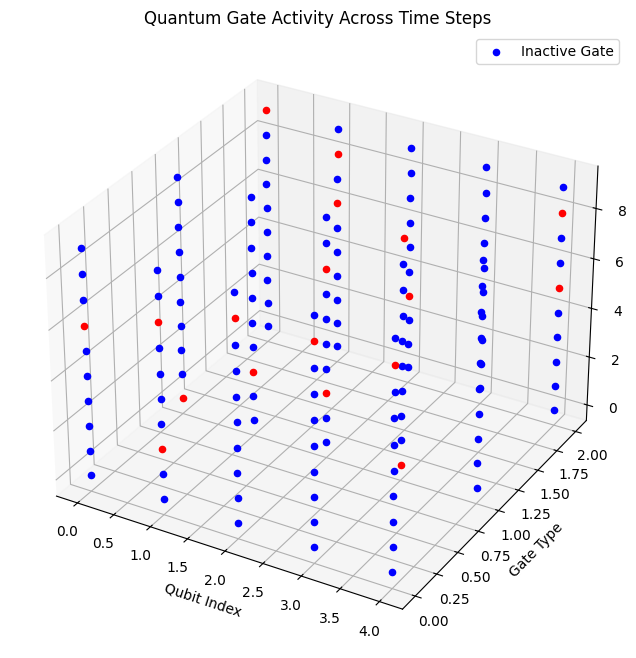

In [9]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 遍历并绘制每个点
for qubit in range(num_qubits):
    for gate_type in range(num_gate_types):
        for time in range(num_timesteps):
            if quantum_circuit_data[qubit, gate_type, time, 1] == 1:
                ax.scatter(qubit, gate_type, time, color='red', label='Active Gate' if (qubit == 0 and gate_type == 0 and time == 0) else "")
            else:
                ax.scatter(qubit, gate_type, time, color='blue', label='Inactive Gate' if (qubit == 0 and gate_type == 0 and time == 0) else "")

# 设置标签和图例
ax.set_xlabel('Qubit Index')
ax.set_ylabel('Gate Type')
ax.set_zlabel('Time Step')
ax.set_title('Quantum Gate Activity Across Time Steps')
ax.legend()

# 显示图形
plt.show()
